# Weather Analysis for Edinburgh and New York 

## Import libraries and csv containing dataset

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from datetime import datetime, time, date
import time
%matplotlib inline

# Import csv
edinburgh_raw = pd.read_csv('./data/IEDINBUR6_weather.csv')

In [2]:
# Fix matplotlib datetime error
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

In [3]:
# View first few rows of the dataset
edinburgh_raw.head()

,Unnamed: 0,Time,TemperatureC,DewpointC,PressurehPa,WindDirection,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,Conditions,Clouds,dailyrainMM,SolarRadiationWatts/m^2,SoftwareType,DateUTC,station
0,0,2015-01-01 00:00:00,10.3,4.5,1001.9,SW,236,9.0,11.9,67,0.0,NaN,NaN,0.0,0.0,HP1001 V1.1.3,2015-01-01 00:00:00,IEDINBUR6
1,1,2015-01-01 00:06:00,10.2,4.4,1001.9,SW,226,6.9,7.9,67,0.0,NaN,NaN,0.0,0.0,HP1001 V1.1.3,2015-01-01 00:06:00,IEDINBUR6
2,2,2015-01-01 00:11:00,10.2,4.4,1001.9,SSW,202,7.2,15.8,67,0.0,NaN,NaN,0.0,0.0,HP1001 V1.1.3,2015-01-01 00:11:00,IEDINBUR6
3,3,2015-01-01 00:16:00,10.2,4.4,1001.9,SSW,202,7.9,11.9,67,0.0,NaN,NaN,0.0,0.0,HP1001 V1.1.3,2015-01-01 00:16:00,IEDINBUR6
4,4,2015-01-01 00:21:00,10.2,4.6,1002.3,South,174,4.3,7.9,68,0.0,NaN,NaN,0.0,0.0,HP1001 V1.1.3,2015-01-01 00:21:00,IEDINBUR6


## Extract temperature data

Rename the temp and date columns, then extract only those columns and save to a new data frame

In [4]:
# Rename temp and date column and convert temp to float, and date to datetime64
edinburgh_raw['temp'] = edinburgh_raw['TemperatureC'].astype(float)
edinburgh_raw['date'] = pd.to_datetime(edinburgh_raw['DateUTC'])


# Extract only date and temperature data
edinburgh_data = edinburgh_raw.loc[:,['date', 'temp']]

In [5]:
# View the segment of the data set we've selected
edinburgh_data.head()

,date,temp
0,2015-01-01 00:00:00,10.3
1,2015-01-01 00:06:00,10.2
2,2015-01-01 00:11:00,10.2
3,2015-01-01 00:16:00,10.2
4,2015-01-01 00:21:00,10.2


## Calculate daily averages

For rows that share the same date, calculate the average temp of each group. Create a new dataframe with average temp per day.

In [6]:
# Use .describe() to get an idea of what's in the dataset
edinburgh_data.describe()

,temp
count,101443.000000
mean,8.288601
std,30.065543
min,-573.300000
25%,6.100000
50%,10.000000
75%,13.100000
max,25.300000


In [7]:
# Strip time from date column
edinburgh_data['date'] = edinburgh_data['date'].apply(lambda edinburgh_data : 
datetime(year=edinburgh_data.year, month=edinburgh_data.month, day=edinburgh_data.day))

# Group by day, calculate mean of each day
edi_group = edinburgh_data.groupby('date').agg({'temp': 'mean'}).reset_index()

edi_group.head()

,date,temp
0,2015-01-01,11.044286
1,2015-01-02,5.139362
2,2015-01-03,4.356184
3,2015-01-04,4.458304
4,2015-01-05,9.355634


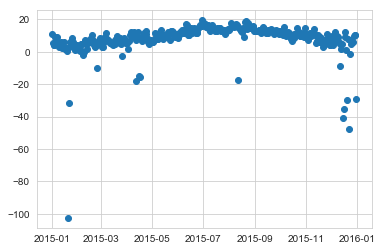

In [8]:
# Plot the data
sns.set_style('whitegrid')
plt.plot_date(x='date',y='temp',data=edi_group)

## Removing outliers

The weather in Edinburgh shouldn't be getting below -20C ever...let's filter this dataset a bit

In [9]:
# Use .describe() to find our min and max values for temp
edi_group.describe()

,temp
count,365.000000
mean,8.308071
std,9.715982
min,-102.607692
25%,5.980797
50%,10.029749
75%,12.833213
max,19.463345


In [10]:
# Filter out all temps lower than -20C
outliers = edi_group.query('temp < -27')
print(outliers)

# Let's look at the original dataset
outliers_raw = edinburgh_raw.query('temp < -27').dropna(how='all').loc[:,['Time', 'TemperatureC']]
print(outliers_raw)

          date        temp
19  2015-01-20 -102.607692
20  2015-01-21  -31.530800
348 2015-12-15  -40.610909
349 2015-12-16  -35.267391
353 2015-12-20  -29.593902
355 2015-12-22  -47.909559
364 2015-12-31  -29.201095
                       Time  TemperatureC
2482    2015-01-09 15:04:00        -573.3
2483    2015-01-09 15:10:00        -573.3
2484    2015-01-09 15:15:00        -573.3
5512    2015-01-20 00:13:00        -573.3
5513    2015-01-20 00:18:00        -573.3
5514    2015-01-20 00:24:00        -573.3
5517    2015-01-20 00:42:00        -573.3
5525    2015-01-20 01:24:00        -573.3
5526    2015-01-20 01:30:00        -573.3
5527    2015-01-20 01:35:00        -573.3
5530    2015-01-20 01:51:00        -573.3
5533    2015-01-20 02:07:00        -573.3
5534    2015-01-20 02:12:00        -573.3
5535    2015-01-20 02:18:00        -573.3
5536    2015-01-20 02:23:00        -573.3
5537    2015-01-20 02:28:00        -573.3
5538    2015-01-20 02:34:00        -573.3
5539    2015-01-20 02:39:00 

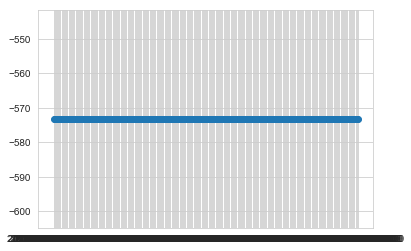

In [11]:
# Print out all the original outliers
plt.plot_date(x='Time',y='TemperatureC',data=outliers_raw)

## Excluding -573.3C from original data set

    All my means are a mess because a single incorrect value was frequently measured (-573.3C). The lowest official value ever measured in Scotland was -27C, so this is clearly a faulty measurement. If I exclude this value from the original data set, it should fix the outlier issue.

In [12]:
# Exclude the 573 temperature measurements from my dataset
edinburgh_minus_573 = edinburgh_raw.query('temp > -572').dropna(how='all')
edinburgh_minus_573.describe()

,Unnamed: 0,TemperatureC,DewpointC,PressurehPa,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,Conditions,Clouds,dailyrainMM,SolarRadiationWatts/m^2,temp
count,101179.000000,101179.000000,101179.000000,101179.000000,101179.000000,101179.000000,101179.000000,101179.000000,101179.00000,0.0,0.0,101179.000000,101178.000000,101179.000000
mean,139.644640,9.806104,5.419540,859.133230,187.495696,4.204907,6.625203,75.399777,0.08806,NaN,NaN,1.136563,94.902815,9.806104
std,82.336611,4.628365,4.430406,768.522456,64.254226,5.254017,6.972527,13.387861,0.87862,NaN,NaN,3.444346,152.546602,4.628365
min,0.000000,-2.300000,-26.000000,-3386.000000,0.000000,0.000000,0.000000,10.000000,0.00000,NaN,NaN,0.000000,0.000000,-2.300000
25%,69.000000,6.200000,2.200000,989.700000,174.000000,0.000000,0.000000,67.000000,0.00000,NaN,NaN,0.000000,0.000000,6.200000
50%,139.000000,10.000000,5.600000,998.200000,205.000000,2.100000,4.000000,77.000000,0.00000,NaN,NaN,0.000000,28.860000,10.000000
75%,209.000000,13.100000,8.800000,1005.300000,229.000000,6.400000,7.900000,84.000000,0.00000,NaN,NaN,0.500000,128.270000,13.100000
max,452.000000,25.300000,18.700000,1026.600000,359.000000,48.600000,60.200000,99.000000,134.40000,NaN,NaN,48.000000,1105.130000,25.300000


In [13]:
# Let's try to clean it up, group it, and plot it now

# Rename temp and date column and convert temp to float, and date to datetime64
edinburgh_minus_573['temp'] = edinburgh_minus_573['TemperatureC'].astype(float)
edinburgh_minus_573['date'] = pd.to_datetime(edinburgh_minus_573['DateUTC'])

# Extract only date and temperature data
edinburgh_minus_573 = edinburgh_minus_573.loc[:,['date', 'temp']]
# Strip time from date column
edinburgh_minus_573['date'] = edinburgh_minus_573['date'].apply(lambda edinburgh_minus_573 : 
datetime(year=edinburgh_minus_573.year, month=edinburgh_minus_573.month, day=edinburgh_minus_573.day))

# Group by day, calculate mean of each day
edi_group_cleaned = edinburgh_minus_573.groupby('date').agg({'temp': 'mean'}).reset_index()

edi_group_cleaned.head()

,date,temp
0,2015-01-01,11.044286
1,2015-01-02,5.139362
2,2015-01-03,4.356184
3,2015-01-04,4.458304
4,2015-01-05,9.355634


Text(0.5, 0.98, 'Avg Daily Temperature in Edinburgh, 2015')

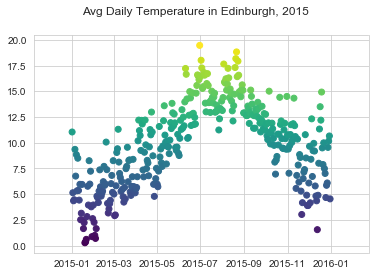

In [14]:
# Plot the data
sns.set_style('whitegrid')
plt.scatter(x='date',y='temp',data=edi_group_cleaned,c='temp', cmap=cm.viridis)
plt.suptitle('Avg Daily Temperature in Edinburgh, 2015')

# Next steps
 Clean up the dataset, convert tempC to tempF, plot vs time

In [15]:
# Add a new column tempF, convert temp column from C to F, plot both sets of data